# 2) Random Variables

[Vitor Kamada](https://www.linkedin.com/in/vitor-kamada-1b73a078)

econometrics.methods@gmail.com

Last updated: 9-16-2020

#### 2.1) What is a random variable?

It is a statistical model that describes uncertain outcome of a random process. 

Let's model stock price as a random variable X:

In [28]:
stock = ['Increases', 'Stays same','Decreases']
x = [10, 0, -9]
prob = [0.3, 0.5, 0.2]
table = {'Stock Price':stock, 'x': x, 'P(X=x)':prob }
import pandas as pd
X = pd.DataFrame(table)
X

,Stock Price,x,P(X=x)
0,Increases,10,0.3
1,Stays same,0,0.5
2,Decreases,-9,0.2


The capital "X" stands for the random variable; whereas the lower case "x" indicates the possible outcomes (10, 0, -9). The statement $P(X=x_i)$ means the probability of the outcome $x_i$. For example, $P(X=x_0) = P(X=10) = 0.3$.

#### 2.2) How to calculate the expected value of a random variable X, denoted by E(X)?

Expected value is a weighted average that uses probabilities to weight the possible outcomes.

Let's calculate the mean ($\mu$) or expected value of the previous example random variable (X):

$$ \mu = E(X) = \sum_{i=0}^{n} x_iP(X=x_i) $$

$$ x_0P(X=x_0)+...+x_nP(X=x_n)$$

$$ 10*0.3+0*0.5-9*0.2$$

$$ 3+0-1.8 = 1.2$$

Therefore, the average return of this stock X is $1.2.

Let's show the calculations step by step:

In [29]:
X['x*P(X=x)'] = X['x']*X['P(X=x)']
X

,Stock Price,x,P(X=x),x*P(X=x)
0,Increases,10,0.3,3.0
1,Stays same,0,0.5,0.0
2,Decreases,-9,0.2,-1.8


Sum up the rows of 'x*P(X=x)':

In [30]:
sum(X['x*P(X=x)'])

1.20

#### 2.3) How to calculate the variance of X, denoted by Var(X)?

The variance of a random variable X is the expected value of the squared deviation from its mean $\mu$:

$$ \sigma^2=E[(X-\mu)^2] = Var(X)$$

$$ \sum_{i=0}^{n} (x_i - \mu)^2 P(X=x_i) $$

$$  (x_0 - \mu)^2 P(X=x_0)+...+(x_n - \mu)^2 P(X=x_n)   $$

$$ 77.44*0.3+1.44*0.5+104.04*0.2 $$

$$ 23.232 + 0.720 + 20.808 $$

$$ 44.76$$

In [31]:
X['x-mu'] = X['x'] - sum(X['x*P(X=x)'])
X['(x-mu)^2'] = X['x-mu']*X['x-mu']
X['[(x-mu)^2]*P(X=x)'] =  X['(x-mu)^2']*X['P(X=x)']
X

,Stock Price,x,P(X=x),x*P(X=x),x-mu,(x-mu)^2,[(x-mu)^2]*P(X=x)
0,Increases,10,0.3,3.0,8.8,77.44,23.23
1,Stays same,0,0.5,0.0,-1.2,1.44,0.72
2,Decreases,-9,0.2,-1.8,-10.2,104.04,20.81


In [32]:
# Round 2 decimals
%precision 2

varX = sum(X['[(x-mu)^2]*P(X=x)'])
varX

44.76

Variance is a measure of variability around the mean. It is hard to interpret 44.76, because the measurement unit is the square of the measurement unit (\$) of the random variable.

#### 2.4) How to calculate the standard deviation of X, denoted by SD(X) or $\sigma$?

Standard Deviation is the square root of the variance.

$$ \sigma = \sqrt{\sigma^2}=\sqrt{Var(X)}$$

$$ \sqrt{44.76} $$ 

$$ \$6.7 $$

In [33]:
sdX = varX**(1/2)
sdX

6.69

The standard deviation, $\sigma = 6.7$, has the same unit (\$) of the random variable. Therefore, it is easy to interpret. 

One $\sigma$ above the mean ($\mu$) or below the mean ($\mu$) is a very likely outcome.

The standard deviation is a measure of variability around the mean. Bigger the number, bigger the variation.

 In Finance, it is a proxy for risk. You want to minimize risk ($\sigma$) and maximize return ($\mu$).

#### 2.5) Prove that $E(cX) = cE(X)$, where c is a constant.

In the previous examples, I was using the index $i$ starting from 0. Let's start counting from 1 but remember that Python starts counting from 0.

By definition:

$$ E(X) = x_1p_1+x_2p_2+...+x_np_n$$

Then:

$$ E(cX) = cx_1p_1+cx_2p_2+...+cx_np_n$$

$$  c(x_1p_1+x_2p_2+...+x_np_n)$$

$$ cE(X)$$




#### 2.6) Prove that $Var(cX)=c^2Var(X)$, where c is a constant.

By definition:

$$ Var(X)=E[(X-\mu_x)^2] $$

Then:

$$ Var(cX)=E[(cX-c\mu_x)^2] $$

$$ E[c^2(X-\mu_x)^2] $$

$$ c^2E[(X-\mu_x)^2] $$

$$ c^2Var(X) $$


#### 2.7) Prove that $E(X+c)=E(X)+c$, where c is a constant.


$$ E(X+c) = (x_1+c)p_1+(x_2+c)p_2+...+(x_n+c)p_n$$

$$  x_1p_1+cp_1+x_2p_2+cp_2+...+x_np_n+cp_n$$

$$  (x_1p_1+x_2p_2+...+x_np_n) + c(p_1+p_2+...+p_n)$$


As probability must sum up to 1:

 $$ \sum_{i=1}^{n}p_i=1 $$

Then:

$$ E(X) + c$$



#### 2.8) Prove that $E(c)=c$, where c is constant.

By definition:
$$ E(X) = x_1p_1+x_2p_2+...+x_np_n$$

Then:

$$ E(c) = cp_1+cp_2+...+cp_n$$

$$ c(p_1+p_2+...+p_n)$$
$$c$$

#### 2.9) Prove that $Var(c) = 0$, where c is a constant.

By definition:

$$ Var(X)=E[(X-\mu_x)^2] $$

Then:

$$ Var(c)=E[(c-\mu_c)^2] $$

$$ E[(c-c)^2] $$

$$ E[(0)^2] $$

$$0$$

**Intuition:** By definition a constant has no variation.



#### 2.10) Draw the distribution or probability mass function (PMF) of a random variable $X$, that represents one roll from a fair six-sided die.

In [34]:
# Library to plot the chart
import matplotlib.pyplot as plt

# Function to plot the chart
def plot_pmf(xs, probs, rv_name='X'):
    plt.plot(xs, probs, 'ro', ms=12, mec='b', color='r')
    plt.vlines(xs, 0, probs, colors='g', lw=4)
    plt.xlabel('$x$')
    plt.ylabel('$P(X = x)$')
    plt.ylim(0, 1)
    plt.title('Probability Mass Function of $X$');

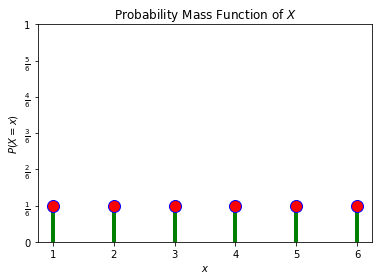

In [35]:
import numpy as np

# Generate x-axis and y-axis
xk = np.arange(1, 7)
pk = (1/6, 1/6, 1/6, 1/6, 1/6, 1/6)

plot_pmf(np.arange(1, 7), np.repeat(1/6, 6))

plt.yticks(np.linspace(0, 1, 7),
           ('0', r'$\frac{1}{6}$', r'$\frac{2}{6}$', r'$\frac{3}{6}$',
            r'$\frac{4}{6}$', r'$\frac{5}{6}$', '1'));

#### 2.11) Show that $Var(X)=E(X^2) -[E(X)]^2$.

$$Var(X)=E[X-E(X)]^2$$

$$=E\{X^2 -2XE(X)+[E(X)]^2\}$$

$$=E(X^2) -2E(X)E(X)+[E(X)]^2$$

$$=E(X^2) -[E(X)]^2$$

#### 2.12) What is the Bernoulli random variable?

It is binary random variable, that can take only two values:
1 and 0. For example, we can simulate a biased coin with $P(Tail) = p$. Let $X = 1$ if the coin flip is tail, and $X = 0$ if the coin flip is head.

|  Outcome |    x    | P(X=x)  | 
|----------|---------|---------|
|   Tail   |    1    |   $p$   |
|   Head   |    0    |  $1-p$  |


The expected value of $X$ is:

$$E[X] = 1 \times p + 0 \times (1 - p) = p$$

The variance of $X$ is:

$$Var(X) = E[X^2] - E[X]^2$$

$$= [1^2 \times p + 0^2 \times (1 - p)] - p^2$$

$$= p - p^2$$

$$= p(1 - p)$$

The standard deviation of $X$ is:

$$SD(X) = \sqrt{Var(X)}$$

$$= \sqrt{p(1 - p)}$$

## Exercises

1| Let the random variable $X$ be the number of heads in three tosses.

The outcome space is:

$$\Omega = \{ HHH, HHT, HTH, THH, HTT, THT, TTH, TTT \}$$

The probability distribution of $X$ is:

|$\text{Possible value of } x$|$~~0~~$|$~~1~~$|$~~2~~$|$~~3~~$|
|-------------------------:|:-----:|:-----:|:-----:|:-----:|
|$P(X = x)$                |$1/8$   |$3/8$  |$3/8$  |$1/8$  |

a) What is the chance of getting more than one head, $P(X>1)$?

b) What is the chance of getting two or less than two heads, $P(X \leq 2)$?

2| Let $Y$ be a random variable that represents a stock.

In [36]:
stock = ['Increases', 'Stays same','Decreases']
y = [5, 0, -3]
prob = [0.4, 0.1, 0.5]
table = {'Stock Price':stock, 'y': y, 'P(Y=y)':prob }
import pandas as pd
Y = pd.DataFrame(table)
Y

,Stock Price,y,P(Y=y)
0,Increases,5,0.4
1,Stays same,0,0.1
2,Decreases,-3,0.5


a) Calculate the $E(Y)$.

b) Calculate $Var(Y)$.

c) Calculate the $SD(Y)$.

3| Let $D$ be a random variable that represents the roll of a single fair six-sided die.


a) Calculate the expected value of $D$.

b) Calculate the standard deviation of $D$.

4| Prove that $Var(X+c)=Var(X)$, where c is a constant.

## Reference

Adhikari, A., Pitman, J. (2020). [Probability for Data Science](http://prob140.org/textbook/README.html).

Diez, D. M., Barr, C. D., Çetinkaya-Rundel, M. (2014). [Introductory Statistics with Randomization and Simulation](https://www.openintro.org/stat/textbook.php?stat_book=isrs). 

Lau, S., Gonzalez, J., Nolan, D. (2020). [Principles and Techniques of Data Science]( https://www.textbook.ds100.org/intro).